In [35]:
import numpy as np
from   matplotlib import pyplot as plt


In [36]:
def model(X_v, y_v):

    C = np.matmul(X_v.T, X_v)
    x_mean = np.mean(X_v, axis=0)


    if type(C) is np.float64:
        inv_C = 1/C
        w     = inv_C * np.matmul(X_v.T, y)
        R2i   = w * np.matmul(X_v.T, X_v) * w / len(y_v)

    else:
        inv_C = np.linalg.inv(C)
        w     = np.matmul(np.matmul(inv_C, X_v.T), y)
        R2i   = np.matmul(np.diag(w.T), np.matmul(np.matmul(X_v.T, X_v), w)) / len(y_v)

    return w, R2i



In [53]:
samples = 10000

def covariance(a): 
    b = np.sqrt(1 - a**2)
    return np.array([
            [1, a, b],
            [a, 1, 0],
            [b, 0, 1]])

phi2_plot = []

for alpha in np.arange(0.0, 1.0, 0.01):
    phi = []
    for i in range(100):
        data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance(alpha), size=samples, check_valid='warn')
        
        X = data[:,:2]
        y = data[:, 2]
        
        (w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)
        phi_1 = 0.5 * (R1 + sum(Rn) - R2)
        phi_2 = 0.5 * (R2 + sum(Rn) - R1)
        phi.append([alpha, phi_1, phi_2])

    
    phi_mean = np.mean(np.array(phi), axis=0)
    phi2_plot.append(phi_mean)
    
    

phi2_plot = np.array(phi2_plot)



In [38]:
phi2_plot

array([[0.00000000e+00, 9.99708208e-01, 4.82102480e-05],
       [1.00000000e-02, 1.00025447e+00, 9.93856150e-05],
       [2.00000000e-02, 9.99043483e-01, 2.48767588e-04],
       [3.00000000e-02, 9.98789869e-01, 5.01626467e-04],
       [4.00000000e-02, 9.98831175e-01, 8.48574328e-04],
       [5.00000000e-02, 9.98424418e-01, 1.29893954e-03],
       [6.00000000e-02, 9.97941615e-01, 1.85126108e-03],
       [7.00000000e-02, 9.97972562e-01, 2.50218962e-03],
       [8.00000000e-02, 9.96579790e-01, 3.24912370e-03],
       [9.00000000e-02, 9.95480791e-01, 4.10065373e-03],
       [1.00000000e-01, 9.94742379e-01, 5.04817312e-03],
       [1.10000000e-01, 9.93617796e-01, 6.09549937e-03],
       [1.20000000e-01, 9.92821760e-01, 7.24612558e-03],
       [1.30000000e-01, 9.92168198e-01, 8.49145254e-03],
       [1.40000000e-01, 9.90401799e-01, 9.85487859e-03],
       [1.50000000e-01, 9.88882338e-01, 1.12840207e-02],
       [1.60000000e-01, 9.86911088e-01, 1.28491196e-02],
       [1.70000000e-01, 9.86014

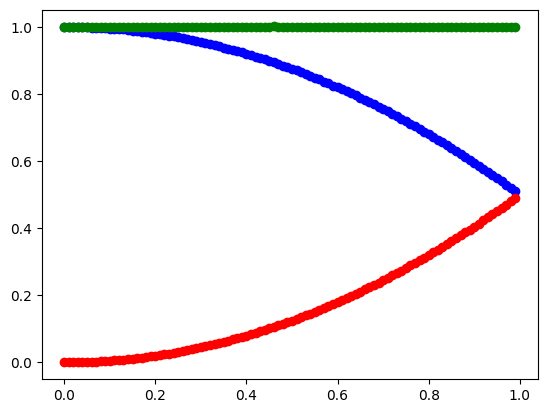

In [39]:
plt.scatter(phi2_plot[:,0], phi2_plot[:,1], color='blue' )
plt.scatter(phi2_plot[:,0], phi2_plot[:,2], color='red' )
plt.scatter(phi2_plot[:,0], (phi2_plot[:,1] + phi2_plot[:,2]), color='green' )


In [43]:
data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance(np.sqrt(0.5)), size=samples, check_valid='warn')

In [44]:
X = data[:,:2]
y = data[:, 2]

(w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)

In [47]:
R2

1.1587293702357554e-05